In [1]:
import sys

sys.path.append("../src/")
sys.path.append("../src/AtomicT")


In [2]:

from AtomicT import dipolelosses
from AtomicT import potentials
from AtomicT import constants
import numpy as np
import pylab as plt
from AtomicT.dipolelosses import DipoleChannels

In [3]:
PWaves=         [[0, 2],[2, 0],[2, 2],[2, 4],[4, 2],[4, 4],[4, 6],[6,4],[6,6],[6,8]]

c=DipoleChannels[0]

B_values = np.logspace(-3,100,50)

pot      = potentials.Silvera_Triplet
T_values = np.logspace(-3,2,50)
B_value  = 1e-5

SummedG=[]
for T in T_values:
    SummedG.append(dipolelosses.GetSummedGFactor(c, B_value, constants.HydrogenConstants, T, pot,PWaves,dm=2, rhos=np.linspace(1e-9,0.75,2000)))
SummedG=np.array(SummedG)

/Users/benjpjones/Documents/Work/AtomicT/src/AtomicT/dipolelosses.py:67: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/benjpjones/Documents/Work/AtomicT/src/AtomicT/spinbasis.py:283: RuntimeWarning: divide by zero encountered in matmul
  Rets[m]=TransformMatrix(np.matmul(np.matmul(TripletProj,SigMatrix),TripletProj),Rotator)
/Users/benjpjones/Documents/Work/AtomicT/src/AtomicT/spinbasis.py:283: RuntimeWarning: overflow encountered in matmul
  Rets[m]=TransformMatrix(np.matmul(np.matmul(TripletProj,SigMatrix),Tripl

In [4]:
GVsB_PW_H=[]


for PW in PWaves:
    Gs=[]
    for T in T_values:
        Gs.append(dipolelosses.GetGFactor(c,  B_value, constants.HydrogenConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=PW[0],lout=PW[1]))
    GVsB_PW_H.append(np.array(Gs))

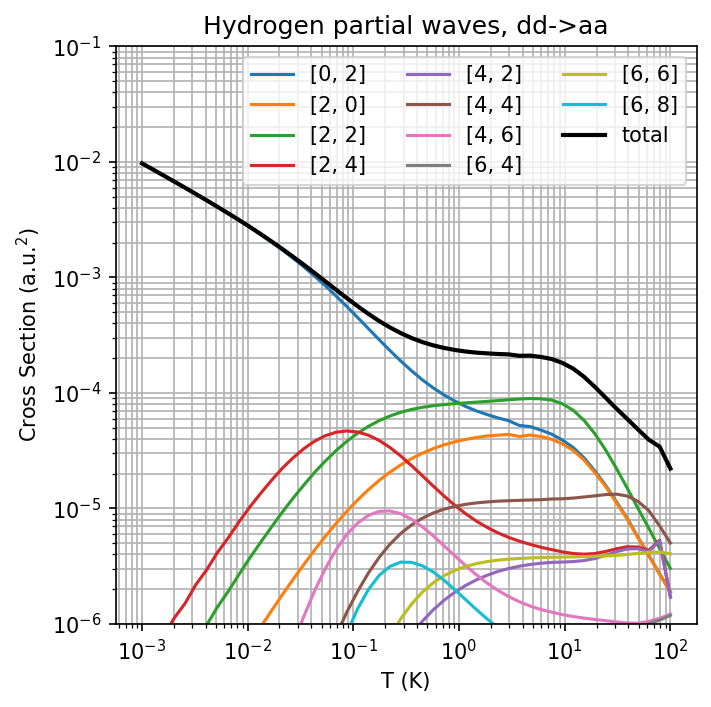

In [5]:
plt.figure(figsize=(5,5),dpi=150)

for iPW in range(0,len(PWaves)):
    plt.plot(T_values,dipolelosses.GetCrossSection(GVsB_PW_H[iPW],1,T_values),label=str(PWaves[iPW]))
plt.plot(T_values, dipolelosses.GetCrossSection(SummedG,1,T_values),linewidth=2,color='black',label='total')
plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Cross Section (a.u.$^2$)')
#plt.ylim(1e-19, 1e-15)
plt.title("Hydrogen partial waves, dd->aa")
plt.grid(which='both')
plt.legend(ncol=3)
plt.loglog()
plt.ylim(1e-6,1e-1)

plt.show()

In [ ]:
#Only showing the most important ones
GVsB_PW_T=[]
PWaves=        PWaves=         [[0, 2],[2, 0],[2, 2],[2, 4],[4, 2],[4, 4],[4, 6],[6,4],[6,6],[6,8]]



for PW in PWaves:
    Gs=[]
    for T in T_values:
        Gs.append(dipolelosses.GetGFactor(c,  B_value, constants.TritiumConstants, T, pot,lin=PW[0],lout=PW[1],rhos=np.linspace(1e-9,0.75,2000),))
    GVsB_PW_T.append(np.array(Gs))

/Users/benjpjones/Documents/Work/AtomicT/src/AtomicT/dipolelosses.py:67: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)


In [31]:
SummedGT=[]
for T in T_values:
    SummedGT.append(dipolelosses.GetSummedGFactor(c, B_value, constants.TritiumConstants, T, pot,PWaves, 2,rhos=np.linspace(1e-9,0.75,2000)))
SummedGT=np.array(SummedGT)

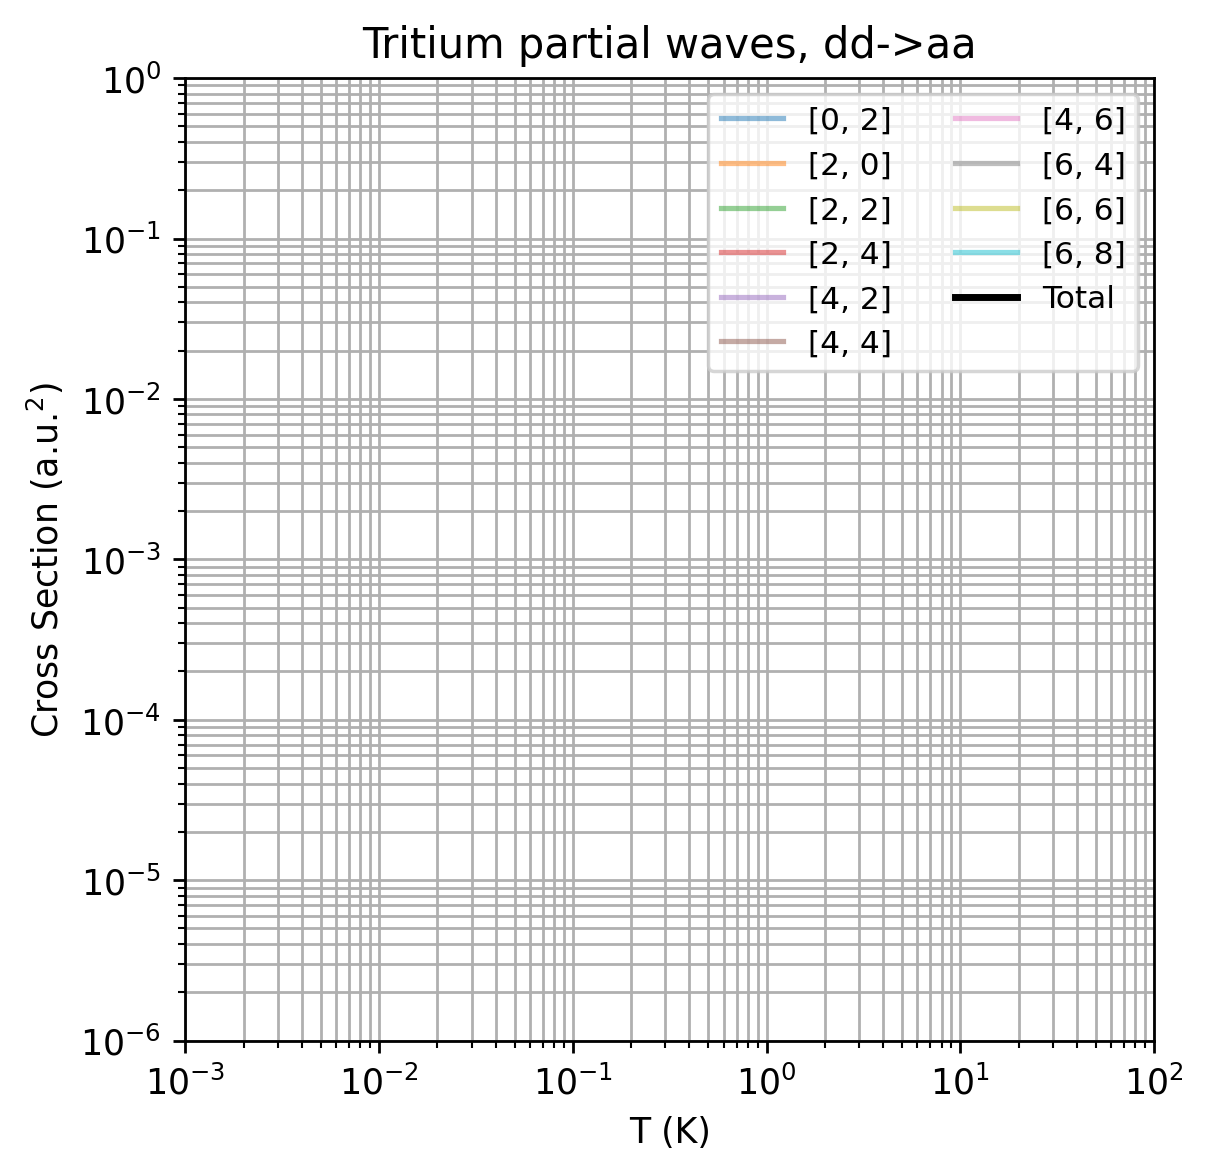

In [32]:

plt.figure(figsize=(5,5),dpi=250)
#PWaves=         [[0, 2],[0,4],[0,6],[2, 0],[2, 2],[2, 4],[2,6],[4, 2],[4, 4],[4, 6],[6,2],[6,4]]

PWaves=       [[0, 2],[2, 0],[2, 2],[2, 4],[4, 2],[4, 4],[4, 6],[6,4],[6,6],[6,8]]

for iPW in range(0,len(PWaves)):
    plt.plot(T_values,dipolelosses.GetCrossSection(GVsB_PW_T[iPW],3,T_values),label=str(PWaves[iPW]),alpha=0.5)
plt.plot(T_values, dipolelosses.GetCrossSection(SummedGT,3,T_values),linewidth=2,color='black',label='Total')
plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Cross Section (a.u.$^2$)')
#plt.ylim(1e-19, 1e-15)
plt.title("Tritium partial waves, dd->aa")
plt.grid(which='both')
plt.legend(ncol=2,fontsize=9)
plt.loglog()
#plt.ylim(1e-6,1)
#plt.xlim(1e-3,1e2)
plt.savefig("Plots/TTPartialsDipole.png",dpi=250,bbox_inches='tight')
plt.show()

In [26]:
import spinexchange
c=spinexchange.SpinExChannels[0]
PWaves=       [0,2,4,6,8]
GVsB_PW_T=[]
potT=potentials.Silvera_Triplet
potS=potentials.Jamieson_Singlet_VDW
for PW in PWaves:
    Gs=[]
    for T in T_values:
        Gs.append(spinexchange.GetGFactor(c,  B_value, constants.HydrogenConstants, T, potT,potS,rhos=np.linspace(1e-9,0.75,2000),l=PW))
    GVsB_PW_T.append(np.array(Gs))
plt.figure(figsize=(5,5),dpi=250)
#PWaves=         [[0, 2],[0,4],[0,6],[2, 0],[2, 2],[2, 4],[2,6],[4, 2],[4, 4],[4, 6],[6,2],[6,4]]



<Figure size 1250x1250 with 0 Axes>

<Figure size 1250x1250 with 0 Axes>

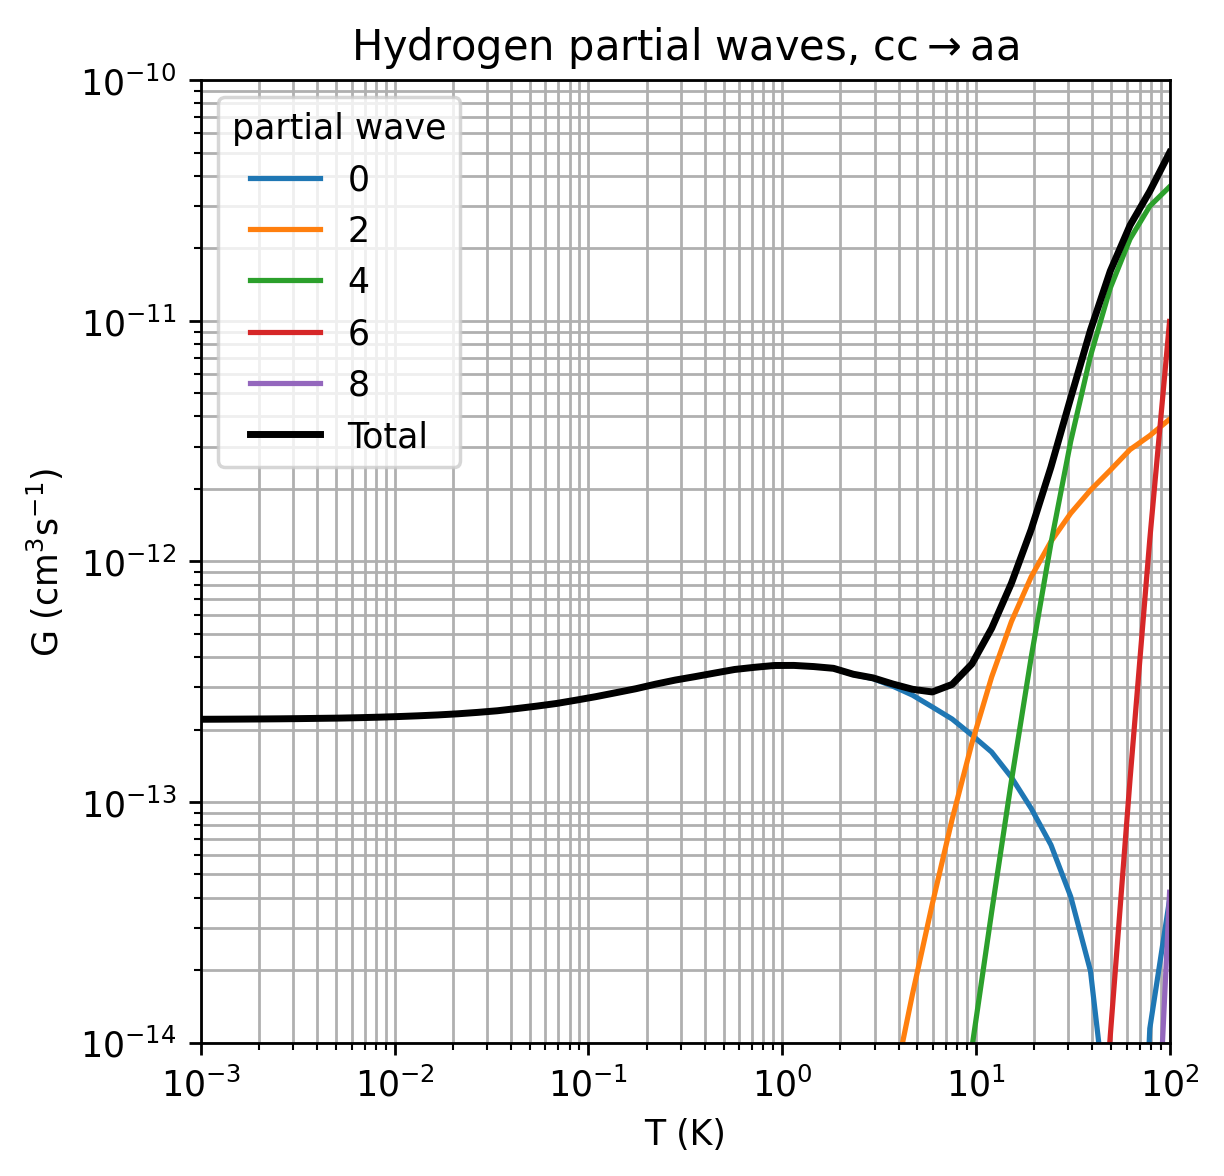

In [27]:
plt.figure(figsize=(5,5),dpi=250)
Total=np.sum(np.array(GVsB_PW_T),axis=0)
for iPW in range(0,len(PWaves)):
    plt.plot(T_values,GVsB_PW_T[iPW],label=str(PWaves[iPW]),alpha=1)
plt.plot(T_values,Total,linewidth=2,color='black',label='Total')
plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'G (cm$^3$s$^{-1}$)')
#plt.ylim(1e-19, 1e-15)
plt.title(r"Hydrogen partial waves, cc$\rightarrow$aa")
plt.grid(which='both')
plt.legend(title='partial wave')
plt.loglog()
#plt.ylim(1e-6,1)
plt.xlim(1e-3,1e2)
plt.ylim(1e-14,1e-10)
plt.savefig("Plots/HHPartialSpinEx.png",dpi=250,bbox_inches='tight')
